In [104]:
import pandas as pd
import numpy as np

In [105]:
# https://www.kaggle.com/datasets/googleai/pfam-seed-random-split
df_train = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.train.csv')
# df_test = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.test.csv')
# df_val = pd.read_csv('/goofys/projects/MAI/data/brain-genomics-public/pfam.valid.csv')

array([[<Axes: title={'center': 'len'}>]], dtype=object)

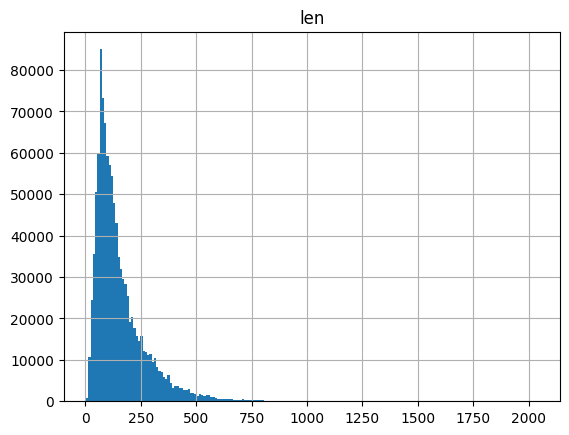

In [106]:
df_train['len'] = df_train['seq'].str.len()
df_train.hist('len', bins=200)

In [107]:
print("[pfam.train.csv] Maximum seq_len:", df_train['len'].max())
print("[pfam.train.csv] Minimum seq_len:", df_train['len'].min())
print("[pfam.train.csv] Mean seq_len:", df_train['len'].mean())
print("[pfam.train.csv] Median seq_len:", df_train['len'].median())

[pfam.train.csv] Maximum seq_len: 2037
[pfam.train.csv] Minimum seq_len: 4
[pfam.train.csv] Mean seq_len: 155.37997094063812
[pfam.train.csv] Median seq_len: 119.0


In [108]:
# Clip length of AA (amino acid) sequence to e.g. 512
df_train['original'] = df_train['seq'].str.slice(0, 512)

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

bow_scalar = CountVectorizer(analyzer='char')
bow_scalar.fit(df_train['original'].values)
tokens = bow_scalar.get_feature_names_out()
tokens = [t.upper() for t in tokens]

In [114]:
import random 
random.seed(0)

def corrupt_sequence(seq, perc = 0.05):
    """Replace 5% of the AA tokens with random one. 

    Args:
        seq: Sequence to be corrupted.
    """
    seq = list(seq)
    for index in random.sample(range(len(seq)), k = int(perc * len(seq))):
        corrupted = random.choice([x for x in tokens if x != seq[index]])
        seq[index] = corrupted
    return ''.join(seq)

In [115]:
df_train['corrupted'] = df_train['original'].apply(corrupt_sequence)

In [116]:
df_train['original'][0]

'PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAILAAAGCAAPFEEFSSADAFSSTHVFGTCRMGHDPMRNVVDGWGRSHRWPNLFVADASLFPSSGGGESPGLTIQALALRT'

In [117]:
df_train['corrupted'][0]

'PHPESQIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAILAAASCAAKFEEFSSADAFSSTHVFGTCRMGHDPMRNVVDGWGRSHRWPNLFQADASLFPSSGKGESPOLTIQALALRT'

In [122]:
# Save [original, corrupted, label] to .csv
df_train[['original', 'corrupted', 'label']].to_csv('pfam.train.csv', index=False)